### Importing Libraries Required

In [0]:
import numpy as np
import pandas as pd
import dask
import seaborn as sns
import dask.dataframe as dd
import os
import json
import seaborn as sns
from time import time
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE,RandomOverSampler, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier,ExtraTreesClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,ExtraTreeRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder, RobustScaler
from math import floor,sqrt

pathw = "/home/adithya/Downloads/weather"
patha = "/home/adithya/Downloads/airplaneDets"

### Mounting Code for Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/SF ML project')

In [0]:
A = pd.read_csv('Full.csv')

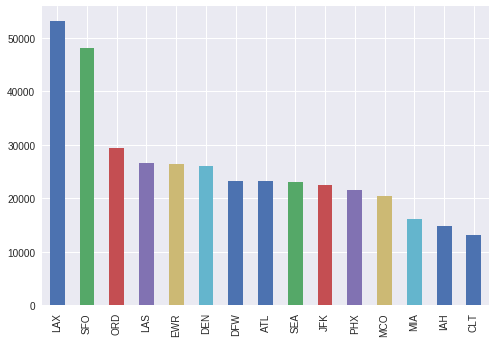

In [0]:
count_orig = A[A["ArrDel15"]==1].Origin.value_counts()
count_dest = A[A["ArrDel15"]==1].Dest.value_counts()
#count_orig.plot.bar()
count_dest.plot.bar()

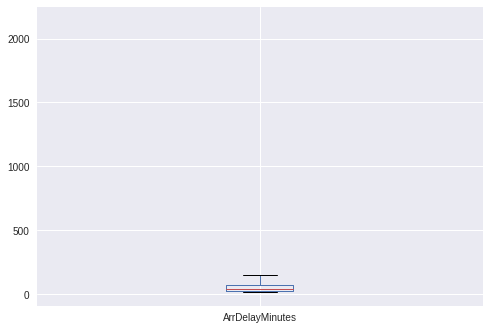

In [6]:

B = A[A.ArrDel15==1].ArrDelayMinutes
B.plot.box()

In [5]:
ale = LabelEncoder()
air_labels = ale.fit_transform(A["Origin"])
air_mappings = {index: label for index,label in enumerate(ale.classes_)}
print(air_mappings)
A['AirportLabel'] = air_labels
A[["Origin","AirportLabel"]].iloc[1:7]
ale = LabelEncoder()
air_labels = ale.fit_transform(A["Dest"])
air_mappings = {index: label for index,label in enumerate(ale.classes_)}
print(air_mappings)
A['AirportLabelD'] = air_labels
A[["Dest","AirportLabelD"]].iloc[1:7]

{0: 'ATL', 1: 'CLT', 2: 'DEN', 3: 'DFW', 4: 'EWR', 5: 'IAH', 6: 'JFK', 7: 'LAS', 8: 'LAX', 9: 'MCO', 10: 'MIA', 11: 'ORD', 12: 'PHX', 13: 'SEA', 14: 'SFO'}
{0: 'ATL', 1: 'CLT', 2: 'DEN', 3: 'DFW', 4: 'EWR', 5: 'IAH', 6: 'JFK', 7: 'LAS', 8: 'LAX', 9: 'MCO', 10: 'MIA', 11: 'ORD', 12: 'PHX', 13: 'SEA', 14: 'SFO'}


,Dest,AirportLabelD
1,ATL,0
2,CLT,1
3,ATL,0
4,SEA,13
5,MIA,10
6,ATL,0


In [8]:
A.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'FlightDate', 'Quarter', 'Year', 'Month',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'Origin', 'Dest', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'timeA', 'timeD', 'Unnamed: 0_x', 'Unnamed: 0.1_x',
       'Code_x', 'Date_x', 'DewPointF_x', 'WindChillF_x', 'WindGustKmph_x',
       'cloudcover_x', 'humidity_x', 'precipMM_x', 'pressure_x', 'tempF_x',
       'time_x', 'visibility_x', 'weatherCode_x', 'winddirDegree_x',
       'windspeedKmph_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y', 'Code_y', 'Date_y',
       'DewPointF_y', 'WindChillF_y', 'WindGustKmph_y', 'cloudcover_y',
       'humidity_y', 'precipMM_y', 'pressure_y', 'tempF_y', 'time_y',
       'visibility_y', 'weatherCode_y', 'winddirDegree_y', 'windspeedKmph_y',
       'AirportLabel', 'AirportLabelD'],
      dtype='object')

In [0]:
feats_air = ['Quarter', 'Year', 'Month','DayofMonth','CRSDepTime', 'AirportLabel', 'AirportLabelD']

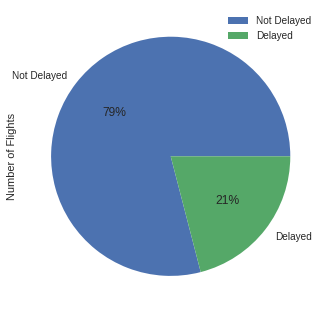

In [0]:
B_0, B_1 = A.ArrDel15.value_counts()
B = pd.DataFrame({'Number of Flights':[B_0,B_1]}, index = ['Not Delayed', 'Delayed'])

B.plot.pie(y = 'Number of Flights', autopct = '%1.0f%%')

In [10]:

A.dropna(inplace = True)

print(A.shape)
feats1 = list(['Unnamed: 0', 'FlightDate', "DepTime","ArrTime", "ArrDel15","DepDel15", 'ArrDelayMinutes', 'timeA' ,'timeD',
'Unnamed: 0_x','Unnamed: 0.1_x','DepDelayMinutes', 'Origin', 'Dest', 'Code_x', 'Date_x', 'Code_y', 
               'Date_y', 'Unnamed: 0_y','Unnamed: 0.1_y', 'time_x', 'time_y'])
feats = list(["pressure_x", "pressure_y", "precipMM_y", "CRSDepTime","Month", "Quarter","DayofMonth",
              "CRSArrTime", "weatherCode_x", "WindGustKmph_x", "windspeedKmph_x", "WindGustKmph_y",
              "weatherCode_y", "windspeedKmph_y", "precipMM_x"])
Y = A.loc[:, ["ArrDel15"]]
#X = A.drop(feats1, axis = 1)
X = A.loc[:, feats_air]

sm = SMOTETomek(random_state=2)
X,Y = sm.fit_sample(X,Y)


(1851421, 55)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Try SVM- Without sampling and over sampling
##### MLP 
##### KNN try 
##### EDA 

In [0]:
X.isnull().sum()

In [0]:
A.dropna(inplace = True)
print(A.shape)
feats1 = list(['Unnamed: 0', 'FlightDate', "DepTime","ArrTime", "ArrDel15","DepDel15", 'ArrDelayMinutes', 'timeA' ,'timeD',
'Unnamed: 0_x','Unnamed: 0.1_x','DepDelayMinutes', 'Origin', 'Dest', 'Code_x', 'Date_x', 'Code_y', 
               'Date_y', 'Unnamed: 0_y','Unnamed: 0.1_y', 'time_X', 'time_Y'])
feats = list([ "Month", "Quarter","DayofMonth",
               'windspeedKmph_x', 'winddirDegree_x',
                'weatherCode_x', 'precipMM_x', 'visibility_x', 'pressure_x', 
                'cloudcover_x', 'DewPointF_x', 'WindGustKmph_x', 'tempF_x', 'WindChillF_x', 'humidity_x', 'AirportLabel','CRSDepTime'])
X = A.loc[:, feats]
Y = A.loc[:, ["DepDel15"]]
sm = SMOTE(random_state=2)
X,Y = sm.fit_sample(X,Y)

(1851421, 55)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
clf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


In [0]:
rf_random.best_params_

In [0]:

Delay = lr.predict(X)
X["DepDel15"] = lr.predict(X)>15.00
X["DelayMinutes"] = Delay
print(X.isnull().sum())

In [0]:
A.dtypes

In [0]:

#X = RobustScaler().fit_transform(X.as_matrix)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 80)

In [0]:
print (metrics.classification_report(y_test, y_pred))

In [0]:
Y.ArrDel15.value_counts()

### Over sampling to solve the problem of imbalanced classes

In [0]:
sm = SMOTE(random_state=2000)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
#print(y_train_res.value_counts())

/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 1109670
After OverSampling, counts of label '0': 1109670


### Using SmoteTomek for imbalanced classes

In [0]:
smt = SMOTETomek(random_state = 100)
X_train_os, y_train_os = smt.fit_sample(X_train,y_train)
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os==0)))

/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, counts of label '1': 1011746
After OverSampling, counts of label '0': 1011746


In [0]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree = DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(X_train_res,y_train_res)

In [0]:
sv = SVC(kernel = 'linear')
sv.fit(X_train, y_train)
print(metrics.classification_report(y_test, sv.predict(X_test)))

/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
sv = SVC(kernel = 'rbf')
sv.fit(X_train, y_train)
print(metrics.classification_report(y_test, sv.predict(X_test)))

In [0]:
for i in X.columns:
    print (pearsonr(X[i],Y['ArrDel15']))

NameError: name 'pearsonr' is not defined

In [0]:
X_train.columns

Index(['Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'ArrTime',
       'DewPointF_x', 'WindChillF_x', 'WindGustKmph_x', 'cloudcover_x',
       'humidity_x', 'precipMM_x', 'pressure_x', 'tempF_x', 'visibility_x',
       'weatherCode_x', 'winddirDegree_x', 'windspeedKmph_x', 'DewPointF_y',
       'WindChillF_y', 'WindGustKmph_y', 'cloudcover_y', 'humidity_y',
       'precipMM_y', 'pressure_y', 'tempF_y', 'visibility_y', 'weatherCode_y',
       'winddirDegree_y', 'windspeedKmph_y', 'AirportLabel', 'AirportLabelD'],
      dtype='object')

### Random Forest implementation for Classification

In [13]:
dt = RandomForestClassifier(verbose = 1, n_jobs = -1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.feature_importances_
print(metrics.classification_report(y_test, dt.predict(X_test)))
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.3s finished


              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79    426463
         1.0       0.79      0.79      0.79    428029

   micro avg       0.79      0.79      0.79    854492
   macro avg       0.79      0.79      0.79    854492
weighted avg       0.79      0.79      0.79    854492



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.7878470483047237


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.1s finished


In [14]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.1s finished


0.7878458780187526


In [0]:
dt = RandomForestClassifier(n_estimators=2000, n_jobs=10, verbose=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.feature_importances_
print(metrics.classification_report(y_test, dt.predict(X_test)))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 13.0min


In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.feature_importances_
print(metrics.classification_report(y_test, dt.predict(X_test)))

In [0]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_test, y_test)
y_pred = dt1.predict(X_train_res)
dt.feature_importances_
print(metrics.classification_report(y_train_res, dt.predict(X_train_res)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1023878
        1.0       1.00      1.00      1.00    272116

avg / total       1.00      1.00      1.00   1295994



### Undersampling to solve the problem of imbalanced classes

In [0]:
A1 = pd.concat([X_train, y_train], axis = 1)
print(A1.isnull().sum())

pressure_x         0
pressure_y         0
precipMM_y         0
CRSDepTime         0
Month              0
Quarter            0
DayofMonth         0
CRSArrTime         0
weatherCode_x      0
WindGustKmph_x     0
windspeedKmph_x    0
WindGustKmph_y     0
weatherCode_y      0
windspeedKmph_y    0
precipMM_x         0
ArrDel15           0
dtype: int64


In [0]:
count_values0, count_values1 = A1.ArrDel15.value_counts()
A2 = A1[A1["ArrDel15"]==0]
A2 = A2.sample(count_values1)
A2 = pd.concat([A2, A1[A1["ArrDel15"]==1]])
print(A2.ArrDel15.value_counts())

1.0    271910
0.0    271910
Name: ArrDel15, dtype: int64


In [0]:
X_train_res = A2.loc[:,feats]
y_train_res = A2.loc[:, "ArrDel15"]
print(X_train.shape, y_train.shape)

(1295994, 15) (1295994, 1)


In [0]:
cor = A.corr()
print(cor['DepDel15'].sort_values())

pressure_x        -0.060262
pressure_y        -0.059103
visibility_y      -0.026570
Month             -0.021117
Quarter           -0.020258
humidity_x        -0.011143
visibility_x      -0.010235
DayofMonth        -0.007045
Unnamed: 0_y       0.001662
Unnamed: 0.1_y     0.001662
Year               0.005349
tempF_y            0.010879
WindChillF_y       0.012433
AirportLabel       0.014515
Unnamed: 0         0.016238
Unnamed: 0.1       0.016238
Unnamed: 0_x       0.020083
Unnamed: 0.1_x     0.020083
winddirDegree_x    0.021290
humidity_y         0.024483
cloudcover_y       0.026671
winddirDegree_y    0.027201
DewPointF_y        0.029772
cloudcover_x       0.030008
AirportLabelD      0.033682
WindChillF_x       0.036525
DewPointF_x        0.036833
tempF_x            0.040245
windspeedKmph_y    0.057428
weatherCode_y      0.057808
precipMM_y         0.058776
ArrTime            0.062789
WindGustKmph_y     0.068288
WindGustKmph_x     0.071606
weatherCode_x      0.080740
precipMM_x         0

### Applying the Gradient Boosting Classifier to the dataset for prediction

In [0]:
gbc = GradientBoostingClassifier(n_estimators=1000, verbose = 1)
gbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, gbc.predict(X_test)))

      Iter       Train Loss   Remaining Time 
         1           1.3699          130.98m
         2           1.3573          127.47m
         3           1.3467          124.53m
         4           1.3378          123.16m
         5           1.3303          122.85m
         6           1.3209          123.41m
         7           1.3152          123.36m
         8           1.3086          123.15m
         9           1.3021          123.73m
        10           1.2966          124.53m
        20           1.2284          120.46m
        30           1.1899          118.02m
        40           1.1613          115.74m
        50           1.1360          114.01m
        60           1.1133          112.30m
        70           1.0923          110.99m
        80           1.0782          109.23m
        90           1.0608          107.96m
       100           1.0469          106.75m
       200           0.9638           97.31m
       300           0.9235           87.52m
       40

In [0]:
gbc = GradientBoostingClassifier(n_estimators = 1000, min_samples_split = 10, verbose = 1)
gbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, gbc.predict(X_test)))

      Iter       Train Loss   Remaining Time 
         1           1.3699          114.16m
         2           1.3573          115.90m
         3           1.3467          115.64m
         4           1.3378          115.73m
         5           1.3303          115.60m
         6           1.3209          116.18m
         7           1.3152          116.43m
         8           1.3086          116.15m
         9           1.3021          115.66m
        10           1.2966          115.46m
        20           1.2284          114.58m
        30           1.1899          111.66m
        40           1.1613          109.22m
        50           1.1360          107.24m
        60           1.1133          105.75m
        70           1.0923          104.71m
        80           1.0782          103.28m
        90           1.0608          103.33m
       100           1.0469          104.04m
       200           0.9638           92.87m
       300           0.9235           80.45m
       40

In [15]:
gbc = GradientBoostingClassifier(n_estimators=2000, min_samples_split=10, verbose=1)
gbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, gbc.predict(X_test)))
print(metrics.accuracy_score(y_test, gbc.predict(X_test)))

      Iter       Train Loss   Remaining Time 
         1           1.3767          104.32m
         2           1.3688          101.06m
         3           1.3623          104.09m
         4           1.3567          112.13m
         5           1.3520          118.34m
         6           1.3481          117.38m
         7           1.3447          120.49m
         8           1.3416          123.16m
         9           1.3391          124.73m
        10           1.3368          125.61m
        20           1.3228          119.19m
        30           1.3149          110.98m
        40           1.3093          106.03m
        50           1.3049          102.22m
        60           1.3015          104.23m
        70           1.2989          105.79m
        80           1.2959          106.08m
        90           1.2939          105.64m
       100           1.2919          104.98m
       200           1.2789          103.97m
       300           1.2701           96.17m


KeyboardInterrupt: ignored

In [0]:
gbc = GradientBoostingClassifier(n_estimators=1000, min_samples_split=5, verbose=1)
gbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, gbc.predict(X_test)))

In [0]:
gbc = GradientBoostingClassifier(n_estimators=1000, min_samples_split = 0.2,verbose=1)
gbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, gbc.predict(X_test)))

      Iter       Train Loss   Remaining Time 
         1           1.3721          115.00m
         2           1.3601          120.43m
         3           1.3498          125.87m
         4           1.3413          126.23m
         5           1.3343          126.38m
         6           1.3267          124.19m
         7           1.3199          124.71m
         8           1.3139          124.99m
         9           1.3089          123.36m
        10           1.3035          123.59m
        20           1.2547          119.67m
        30           1.2171          117.02m
        40           1.1843          115.61m
        50           1.1613          114.36m
        60           1.1420          113.24m
        70           1.1189          112.22m
        80           1.1047          110.86m
        90           1.0923          109.59m
       100           1.0790          108.33m
       200           0.9974           95.95m
       300           0.9504           83.99m
       40

In [0]:
X.columns

Index(['Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'ArrTime',
       'DewPointF_x', 'WindChillF_x', 'WindGustKmph_x', 'cloudcover_x',
       'humidity_x', 'precipMM_x', 'pressure_x', 'tempF_x', 'visibility_x',
       'weatherCode_x', 'winddirDegree_x', 'windspeedKmph_x', 'DewPointF_y',
       'WindChillF_y', 'WindGustKmph_y', 'cloudcover_y', 'humidity_y',
       'precipMM_y', 'pressure_y', 'tempF_y', 'visibility_y', 'weatherCode_y',
       'winddirDegree_y', 'windspeedKmph_y', 'AirportLabel', 'AirportLabelD'],
      dtype='object')

In [0]:
print(metrics.confusion_matrix(y_test, gbc.predict(X_test)))

[[394388  44900]
 [ 88055  28084]]


### Applying Logistic Regression

In [0]:
logr = LogisticRegression(penalty = 'l2', max_iter = 100)
logr.fit(X_train,y_train)
print(metrics.classification_report(y_test, logr.predict(X_test)))

/home/adithya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Applying Extra Tree Classifier to the dataset

In [0]:

et=ExtraTreesClassifier(n_estimators = 1000, verbose = 1, n_jobs = 10)
et.fit(X_train, y_train)
print(metrics.classification_report(y_test, et.predict(X_test)))

In [0]:
et=ExtraTreeClassifier(max_depth=32)
et.fit(X_train_res, y_train_res)
print(metrics.classification_report(y_test, et.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83    369679
        1.0       0.34      0.34      0.34     93177

avg / total       0.73      0.73      0.73    462856



In [0]:
et=ExtraTreeClassifier()
et.fit(X_train, y_train)
print(metrics.classification_report(y_test, et.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.83      0.82      0.82    439288
        1.0       0.34      0.35      0.35    116139

avg / total       0.72      0.72      0.72    555427



In [0]:
metrics.confusion_matrix(y_test, et.predict(X_test))

array([[358108,  81180],
       [ 76095,  40044]])

In [0]:
X_train.columns

Index(['pressure_x', 'pressure_y', 'tempF_y', 'weatherCode_x',
       'WindGustKmph_x', 'windspeedKmph_x', 'WindGustKmph_y', 'weatherCode_y',
       'windspeedKmph_y', 'precipMM_x'],
      dtype='object')

In [0]:
dt.feature_importances_

array([0.12248584, 0.12016006, 0.15937371, 0.05492645, 0.11666593,
       0.09923947, 0.11834066, 0.05689523, 0.10656905, 0.04534361])

In [0]:
print(metrics.mean_absolute_error(y_test, logr.predict(X_test)))

0.3686574766456423


In [0]:
print(metrics.mean_absolute_error(y_test, dt.predict(X_test)))

0.04962213985882625


In [0]:
print(metrics.classification_report(y_test, dt.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      0.94      0.97    458359
        1.0       0.78      1.00      0.87     95285

avg / total       0.96      0.95      0.95    553644



In [0]:
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))

[[430985  27374]
 [    99  95186]]


## Model tuning

In [0]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train_res, y_train_res)
   train_pred = dt.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_res, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


In [0]:

line1 = plt.plot(max_features, train_results, color = 'blue', label='Train AUC')
line2 = plt.plot(max_features, test_results, color = 'red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [0]:
max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = ExtraTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_res, y_train_res)
   train_pred = dt.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_res, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [0]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train_res, y_train_res)
   train_pred = dt.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds =    metrics.roc_curve(y_train_res, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
#from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [0]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train_res, y_train_res)
   train_pred = dt.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_res, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
#from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [0]:
X_train.columns

In [0]:
X.dtypes

In [0]:
A1 = A[A["ArrDel15"]==1]
#A1 = A.copy()
A1.dropna(inplace = True)
feats = list(["humidity_x" ,"DewPointF_y","WindGustKmph_x","precipMM_x","DewPointF_x","weatherCode_x","humidity_y",
             "pressure_x", "AirportLabel", "visibility_y", "visibility_x", "tempF_y" ])
feats1 = list(['Unnamed: 0', 'FlightDate', "DepTime","ArrTime", "ArrDel15","DepDel15", 'ArrDelayMinutes', 'timeA' ,'timeD',
'Unnamed: 0_x','Unnamed: 0.1_x', 'Origin', 'Dest', 'Code_x', 'Date_x', 'Code_y', 
               'Date_y', 'Unnamed: 0_y','Unnamed: 0.1_y', 'time_x', 'time_y'])
lr = LinearRegression(normalize = True, n_jobs = -1)
Y = A1.loc[:, ["ArrDelayMinutes"]]
X = A1.drop(feats1, axis = 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
X.isnull().sum()

In [0]:
#for i in range(300):
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 40)
lr.fit(X_train, y_train)
print(sqrt(metrics.mean_absolute_error(y_test, lr.predict(X_test))))
#rmse.append([sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test)))])
#rmse = np.asarray(rmse)
#argmin(rmse)

3.7943728644953634


In [0]:
print(A.shape)

(387635, 54)


### Applying Extra Tree Regressor to the dataset to calculate the amount of delay
#### As of now this model performs best with a error of 23.9311

In [0]:
etr=ExtraTreeRegressor()
etr.fit(X_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [0]:
print(metrics.mean_absolute_error(y_test,etr.predict(X_test)))
print(metrics.r2_score(y_test,etr.predict(X_test)))

16.673847871837822
0.884867002926721


In [0]:
#rtr = RandomForestRegressor()
#rtr.fit(X_train, y_train)
print(metrics.mean_absolute_error(y_test,rtr.predict(X_test)))
print(metrics.r2_score(y_test, rtr.predict(X_test)))

12.32978138556028
0.9419850329269797


In [0]:
gbr = GradientBoostingRegressor(n_estimators = 2000, verbose = 1)
gbr.fit(X_train, y_train)
print(metrics.mean_absolute_error(y_test, gbr.predict(X_test)))
print(metrics.r2_score(y_test, gbr.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        4276.3909           17.57m
         2        3555.4576           18.26m
         3        2963.5222           20.89m
         4        2479.5284           22.15m
         5        2084.0165           22.50m
         6        1759.3754           21.58m
         7        1495.1091           20.92m
         8        1278.7690           20.41m
         9        1102.0033           20.11m
        10         957.8991           19.87m
        20         394.4354           19.86m
        30         311.5575           19.06m
        40         295.5818           19.20m
        50         290.0702           19.46m
        60         286.9192           19.47m
        70         284.7145           19.22m
        80         283.0839           19.29m
        90         281.8422           19.32m
       100         280.8222           18.98m
       200         275.0097           17.73m
       300         271.3547           16.73m
       40

In [0]:
pred = {'pred': gbr.predict(X_test)}
df = pd.DataFrame.from_dict(pred, orient = 'columns')


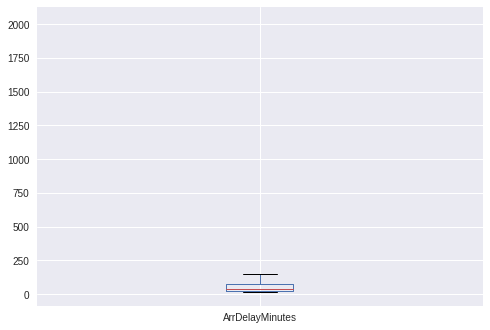

In [0]:
y_test.boxplot()


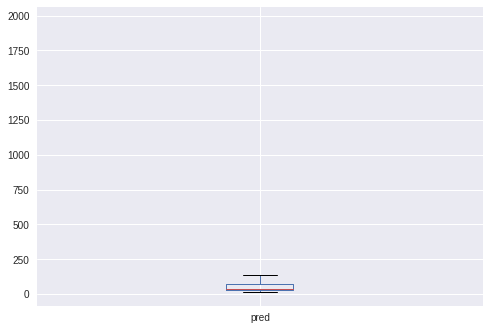

In [0]:
df.boxplot()

In [0]:
for train, test in B:
        print(train.shape,test.shape)
        break

(286178,) (31798,)
